# Demo: fetching NAVO glider data

In [14]:
import numpy as np
import xarray as xr
from siphon.catalog import TDSCatalog
import matplotlib.pyplot as plt

In [15]:
base_url = 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/'
cat = TDSCatalog('http://smode.whoi.edu:8080/thredds/catalog/insitu/navo_glider/catalog.html')

In [16]:
# print("\n".join(cat.datasets.keys()))

In [17]:
# First, let's take a look single data file
glider_data = xr.open_dataset(base_url+'ng780_2021_0906_1120_0123737W_037354N_21242000057.nc')

In [18]:
glider_data

<xarray.Dataset>
Dimensions:           (prof_num: 2, salt_flag_num: 2, temp_flag_num: 2, time: 1597)
Dimensions without coordinates: prof_num, salt_flag_num, temp_flag_num, time
Data variables:
    temp_flag_index   (temp_flag_num) int32 ...
    temp_flag         (temp_flag_num) int32 ...
    salt_flag_index   (salt_flag_num) int32 ...
    salt_flag         (salt_flag_num) int32 ...
    latitude          (time) float32 ...
    longitude         (time) float32 ...
    scitime           (time) timedelta64[ns] ...
    temp              (time) float32 ...
    orig_temp         (time) float32 ...
    conductivity      (time) float32 ...
    cond_orig         (time) float32 ...
    salinity          (time) float32 ...
    depth             (time) float32 ...
    prof_start_index  (prof_num) int32 ...
    prof_end_index    (prof_num) int32 ...
Attributes:
    Conventions:                       CF-1.0
    instrumentid:                      NG780
    institution:                       Naval Oceanographic Offic
    history:                           Written Sep 06, 2021 12:03
    dive_number:                       21242000057
    file_version:                      2.0
    file_data_type:                    timeseries
    original_file_name:                ng780-2021-242-0-57
    Glidertype:                        Slocum_Glider
    tbdfound:                          1
    Classification:                    PUBLIC RELEASE
    Classification_Key:                100
    Classification_Statement:          *** UNCLASSIFIED PUBLIC DOMAIN *** DIS...
    Received_yyyy_mm_dd_hh_mm_ss_gmt:  2021 09 06 11 20 58

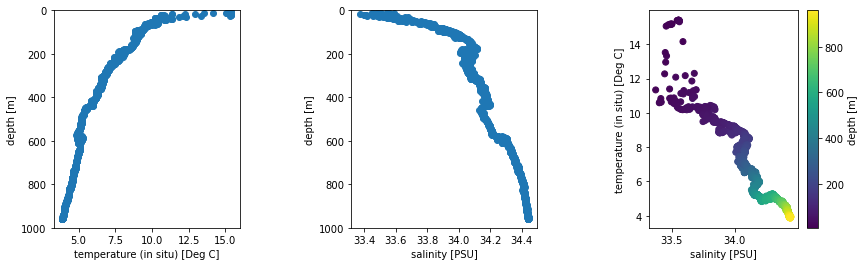

In [27]:
# Quick and dirty plots
fig, axs = plt.subplots(1,3,figsize=(14,4))

glider_data.plot.scatter(x='temp',y='depth',ax=axs[0])

plt.subplots_adjust(wspace=.6)

glider_data.plot.scatter(x='salinity',y='depth',ax=axs[1])

[ax.set_ylim(1000,0) for ax in axs[:2]]

im = glider_data.plot.scatter(x='salinity',
                              y='temp',
                              c=glider_data.depth,
                              ax=axs[2]

)
plt.colorbar(im,label='depth [m]')

In [52]:
# Splitting the profiles
glider_data.prof_start_index

start_index = glider_data.prof_start_index.values
end_index = glider_data.prof_end_index.values

profile1 = glider_data.isel(time = range(start_index[0],end_index[0]+1))
profile2 = glider_data.isel(time = range(start_index[1],end_index[1]+1))

[(1000.0, 0.0), (1000.0, 0.0)]

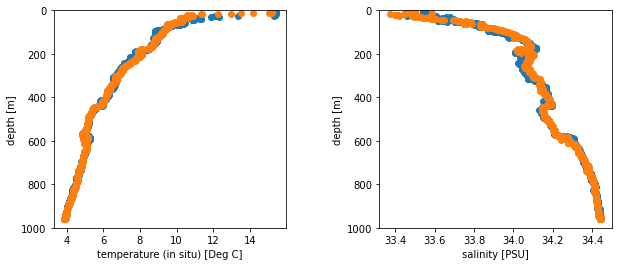

In [74]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

fig.subplots_adjust(wspace=0.4)

for profile in [profile1, profile2]:

    profile.plot.scatter(x='temp',
                         y='depth',
                         ax=axs[0]
    )
   
    profile.plot.scatter(x='salinity',
                         y='depth',
                         ax=axs[1]
    )

[ax.set_ylim(1000,0) for ax in axs]

In [75]:
# Now see how we'd go about getting all the data

In [103]:
ids = ['ng231','ng258','ng268','ng316',
       'ng350','ng533','ng599','ng665',
        'ng734','ng780'
]

In [78]:
# Get url for all data from a single glider
filelist=[file for file in 
            cat.datasets if file.startswith(gliders[0])]

datapath = [base_url+f for f in filelist]

In [82]:
datapath = sorted(datapath)
datapath

['http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng231_2021_0831_0726_0123220W_037135N_21241050007.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng231_2021_0831_0726_0123220W_037135N_21241050007_optics.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng231_2021_0831_0919_0123227W_037139N_21242000000.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng231_2021_0831_0919_0123227W_037139N_21242000000_optics.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng231_2021_0831_1117_0123242W_037147N_21242000002.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng231_2021_0831_1117_0123242W_037147N_21242000002_optics.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng231_2021_0831_1313_0123253W_037159N_21242000004.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng231_2021_0831_1313_0123253W_037159N_21242000004_optics.nc',
 'http://smode.whoi.edu:8080/thredds

In [84]:
# We can also get all the urls for data with or without 
#   optics data, e.g.:
datapath_optics = [base_url+f for f in filelist
                          if 'optics' in f]

datapath_optics = sorted(datapath_optics)
datapath_optics

['http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng231_2021_0831_0726_0123220W_037135N_21241050007_optics.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng231_2021_0831_0919_0123227W_037139N_21242000000_optics.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng231_2021_0831_1117_0123242W_037147N_21242000002_optics.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng231_2021_0831_1313_0123253W_037159N_21242000004_optics.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng231_2021_0831_1516_0123269W_037181N_21242000007_optics.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng231_2021_0831_1710_0123269W_037181N_21242000009_optics.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng231_2021_0831_1918_0123296W_037199N_21242000012_optics.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng231_2021_0831_2112_0123296W_037199N_21242000014_optics.nc',
 'http:/

In [86]:
glider_data_optics = xr.open_dataset(datapath_optics[-1])

In [87]:
glider_data_optics

<xarray.Dataset>
Dimensions:                  (optics_flag_num: 1, prof_num: 2, time: 391)
Dimensions without coordinates: optics_flag_num, prof_num, time
Data variables:
    optics_flag_index        (optics_flag_num) int32 ...
    optics_flag              (optics_flag_num) int32 ...
    latitude                 (time) float32 ...
    longitude                (time) float32 ...
    depth                    (time) float32 ...
    sci_bbam_timestamp       (time) timedelta64[ns] ...
    sci_bbam_beam_c          (time) float32 ...
    sci_bbam_factory_beam_c  (time) float32 ...
    prof_start_index         (prof_num) int32 ...
    prof_end_index           (prof_num) int32 ...
Attributes:
    Conventions:                       CF-1.0
    instrumentid:                      NG231
    institution:                       Naval Oceanographic Offic
    history:                           Written Oct 09, 2021 03:03
    dive_number:                       21242000205
    file_version:                      2.0
    file_data_type:                    timeseries
    original_file_name:                ng231-2021-242-0-205
    Glidertype:                        Slocum_Glider
    tbdfound:                          1
    Classification:                    PUBLIC RELEASE
    Classification_Key:                100
    Classification_Statement:          *** UNCLASSIFIED PUBLIC DOMAIN *** DIS...
    Received_yyyy_mm_dd_hh_mm_ss_gmt:  2021 10 09 02 30 45

In [101]:
# Dealing with time: sci_time is time since 1/1/1970
start =  np.datetime64('1970-01-01')  - np.timedelta64(1,'D')
glider_data_optics.sci_bbam_timestamp + start

<xarray.DataArray 'sci_bbam_timestamp' (time: 391)>
array(['2021-10-07T22:45:11.000000000', '2021-10-07T22:45:18.000000000',
       '2021-10-07T22:45:24.000000000', '2021-10-07T22:45:31.000000000',
       '2021-10-07T22:45:37.000000000', '2021-10-07T22:45:44.000000000',
       '2021-10-07T22:45:50.000000000', '2021-10-07T22:45:57.000000000',
       '2021-10-07T22:46:03.000000000', '2021-10-07T22:46:10.000000000',
       '2021-10-07T22:46:16.000000000', '2021-10-07T22:46:23.000000000',
       '2021-10-07T22:46:29.000000000', '2021-10-07T22:46:36.000000000',
       '2021-10-07T22:46:42.000000000', '2021-10-07T22:46:49.000000000',
       '2021-10-07T22:46:55.000000000', '2021-10-07T22:47:02.000000000',
       '2021-10-07T22:47:08.000000000', '2021-10-07T22:47:15.000000000',
       '2021-10-07T22:47:21.000000000', '2021-10-07T22:47:28.000000000',
       '2021-10-07T22:47:34.000000000', '2021-10-07T22:47:41.000000000',
       '2021-10-07T22:47:47.000000000', '2021-10-07T22:47:54.000000000',
       '2021-10-07T22:48:00.000000000', '2021-10-07T22:48:06.000000000',
       '2021-10-07T22:48:13.000000000', '2021-10-07T22:48:19.000000000',
       '2021-10-07T22:48:26.000000000', '2021-10-07T22:48:32.000000000',
       '2021-10-07T22:48:39.000000000', '2021-10-07T22:48:45.000000000',
       '2021-10-07T22:48:52.000000000', '2021-10-07T22:48:58.000000000',
       '2021-10-07T22:49:05.000000000', '2021-10-07T22:49:11.000000000',
       '2021-10-07T22:49:18.000000000', '2021-10-07T22:49:24.000000000',
...
       '2021-10-08T02:26:47.000000000', '2021-10-08T02:26:54.000000000',
       '2021-10-08T02:27:00.000000000', '2021-10-08T02:27:07.000000000',
       '2021-10-08T02:27:13.000000000', '2021-10-08T02:27:20.000000000',
       '2021-10-08T02:27:26.000000000', '2021-10-08T02:27:33.000000000',
       '2021-10-08T02:27:39.000000000', '2021-10-08T02:27:46.000000000',
       '2021-10-08T02:27:52.000000000', '2021-10-08T02:27:59.000000000',
       '2021-10-08T02:28:05.000000000', '2021-10-08T02:28:11.000000000',
       '2021-10-08T02:28:18.000000000', '2021-10-08T02:28:24.000000000',
       '2021-10-08T02:28:31.000000000', '2021-10-08T02:28:37.000000000',
       '2021-10-08T02:28:44.000000000', '2021-10-08T02:28:50.000000000',
       '2021-10-08T02:28:57.000000000', '2021-10-08T02:29:03.000000000',
       '2021-10-08T02:29:10.000000000', '2021-10-08T02:29:16.000000000',
       '2021-10-08T02:29:23.000000000', '2021-10-08T02:29:29.000000000',
       '2021-10-08T02:29:36.000000000', '2021-10-08T02:29:42.000000000',
       '2021-10-08T02:29:49.000000000', '2021-10-08T02:30:02.000000000',
       '2021-10-08T02:30:08.000000000', '2021-10-08T02:30:15.000000000',
       '2021-10-08T02:30:21.000000000', '2021-10-08T02:30:28.000000000',
       '2021-10-08T02:30:34.000000000', '2021-10-08T02:30:41.000000000',
       '2021-10-08T02:30:47.000000000', '2021-10-08T02:30:54.000000000',
       '2021-10-08T02:31:00.000000000'], dtype='datetime64[ns]')
Dimensions without coordinates: time

In [110]:
data

<xarray.Dataset>
Dimensions:                  (optics_flag_num: 1, prof_num: 2, time: 391)
Dimensions without coordinates: optics_flag_num, prof_num, time
Data variables:
    optics_flag_index        (optics_flag_num) int32 -1
    optics_flag              (optics_flag_num) int32 -1
    latitude                 (time) float32 37.35 37.35 37.35 ... 37.32 37.32
    longitude                (time) float32 -124.2 -124.2 ... -124.2 -124.2
    depth                    (time) float32 34.17 34.95 35.61 ... 15.44 14.87
    sci_bbam_timestamp       (time) timedelta64[ns] 18908 days 22:45:11 ... 1...
    sci_bbam_beam_c          (time) float32 0.2232 0.2217 0.2254 ... 0.169 0.172
    sci_bbam_factory_beam_c  (time) float32 0.213 0.211 0.215 ... 0.159 0.161
    prof_start_index         (prof_num) int32 0 175
    prof_end_index           (prof_num) int32 174 390
Attributes:
    Conventions:                       CF-1.0
    instrumentid:                      NG231
    institution:                       Naval Oceanographic Offic
    history:                           Written Oct 09, 2021 03:03
    dive_number:                       21242000205
    file_version:                      2.0
    file_data_type:                    timeseries
    original_file_name:                ng231-2021-242-0-205
    Glidertype:                        Slocum_Glider
    tbdfound:                          1
    Classification:                    PUBLIC RELEASE
    Classification_Key:                100
    Classification_Statement:          *** UNCLASSIFIED PUBLIC DOMAIN *** DIS...
    Received_yyyy_mm_dd_hh_mm_ss_gmt:  2021 10 09 02 30 45

In [112]:
# Get url for all data from all gliders
filelist=[file for file in cat.datasets]
    
datapath = [base_url+file for file in filelist
                if 'optics' not in file]

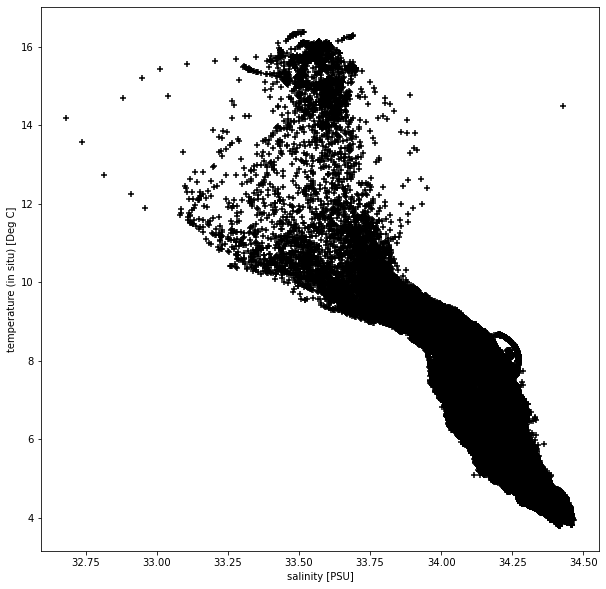

In [127]:
# Plot a TS diagram with several profilesd from all gliders to 
#   showcase an example of how to get all data

fig, ax = plt.subplots(figsize=(10,10))

kwargs = {
    'color': 'k',
    'marker': '+',
    'ax': ax
}

for path in datapath[::20]:

    data = xr.open_dataset(path)

    data.plot.scatter(x='salinity',
                      y='temp',
                      **kwargs)